 # Reddy Mikks
 Reddy Mikks produce pinturas para interiores y exteriores con dos materias primas, $M1$ y $M_2$. La tabla siguiente proporciona los datos básicos del problema.

 |                                 | Pintura para exteriores | Pintura para interiores | Disponibilidad (toneladas) |
 |---------------------------------|-------------------------|-------------------------|----------------------------|
 | Materia prima $M_1$             | 6                       | 4                       | 24                         |
 | Materia prima $M_2$             | 1                       | 2                       | 6                          |
 | Utilidad por tonelada (\\$1000) | 5                       | 4                       |                            |

 ## Model

 $$\max z = 5x_1 + 4x_2$$
 s.t.
 $$\begin{align*}
 6x_1 + 4x_2  & \leq 24 \\
 x_1 + x_2 & \leq 6\\
 -x_1 + x_2 & \leq 1\\
 x_2  & \leq 2\\
 x_1, x_2 & \geq 0\\
 \end{align*}$$


In [32]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

 ## Domain Function

In [33]:
x = np.linspace(-1, 50, 5)


 ## Objective Function

In [34]:
zfunction = lambda z, x: (z - 5 * x) / 4
zlabel = r"$Z = 5x_1 + 4x_2$"
zdomain = np.linspace(5, 20, 5)


 ## Equations

In [35]:
equation1 = (24 - 6 * x) / 4
equation2 = (6 - x) / 2
equation3 = 1 + x
equation4 = np.full_like(x, 2)  #  it's a constant


 ## Labels

In [36]:
labels = [
    r"$Eq1:\, 6x_1 + 4x_2 = 24$",
    r"$Eq2:\, x_1 + 2x_2 = 6$",
    r"$Eq3:\, -x_1 + x_2 = 1$",
    r"$Eq4:\, x_2= 2$",
]


In [37]:
equations = [
    equation1, 
    equation2, 
    equation3, 
    equation4,
    ]

 ## Plotting

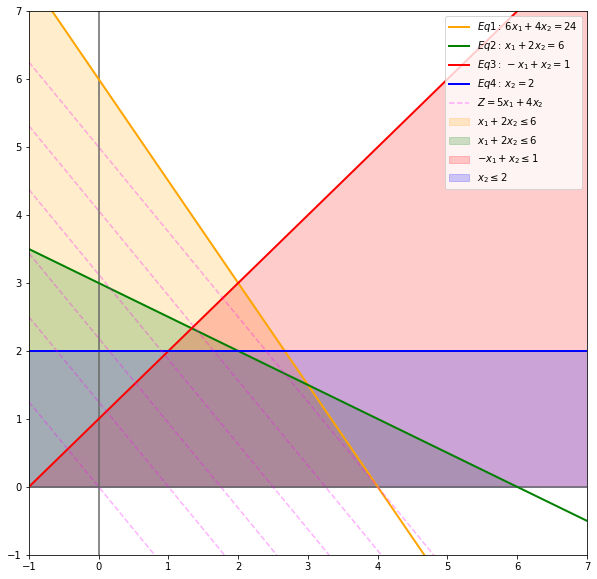

In [38]:
plt.figure(figsize=(10, 10))
plt.xlim(-1, 7)
plt.ylim(-1, 7)

plt.axvline(0, color="0.4")
plt.axhline(0, color="0.4")

plt.plot(x, equation4)
colors = ("orange", "green", "red", "blue")
# Plot lines: x, f(x)
for equation, label, c in zip(equations, labels, colors):
    plt.plot(x, equation, lw=2, color=c, label=label)

# Plot z values
plt.plot(x, zfunction(0, x), color="magenta", ls="--", label=zlabel, alpha=0.3)
for z in zdomain:
    plt.plot(x, zfunction(z, x), ls="--", color="magenta", alpha=0.3)

# Plot areas
plt.fill_between(x, 
                equation1, 
                where=(x < equation1), 
                color=colors[0], 
                alpha=0.2, 
                interpolate=True,
                label=r"$x_1 + 2x_2 \leq 6$")

plt.fill_between(x,
                 equation2, 
                 where=(x < equation2), 
                 color=colors[1], 
                 alpha=0.2, 
                 interpolate=True,
                 label=r"$x_1 + 2x_2 \leq 6$",
                 )

plt.fill_between(x, 
                equation3,
                where=(x <= equation3), 
                color=colors[2], 
                alpha=0.2, 
                interpolate=True,
                label=r"$-x_1 + x_2 \leq 1$")

plt.fill_between(x, 
                equation4,
                color=colors[3],
                alpha=0.2,
                label=r"$x_2 \leq 2$",
                )
plt.legend(
    fontsize=10, 
    loc="upper right"
    )
plt.show()



 ## Find Feasible Solutions
 [Solve a linear matrix equation wity Numpy](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html)

In [39]:
A = np.array([# index
    [ 6, 4],  # 0: Eq1
    [ 1, 2],  # 1: Eq2
    [-1, 1],  # 2: Eq3  
    [ 0, 1],  # 3: Eq4
    [ 0, 1],  # 4: x axis
    [ 1, 0],  # 5: y axis
    ], dtype=float)

b = np.array([
    24,  # 0: Eq1 
    6,   # 1: Eq2
    1,   # 2: Eq3
    2,   # 3: Eq4
    0,   # 4: x axis
    0,   # 5: y axis
    ], dtype=float)


 Linear System Equations

In [40]:
sysequations = [
    (0, 4),  # Eq1 vs x axis
    (0, 1),  # Eq1 vs Eq2
    (1, 3),  # Eq2 vs Eq4  
    (2, 3),  # Eq3 vs Eq4
    (2, 5),  # Eq3 vs y axis
    (4, 5),  # Origin
    ]


print(len(sysequations))


6


In [41]:
print(A[ sysequations[0] , : ])
print(b[[*sysequations[0]]])


print(np.linalg.solve(A[ sysequations[0] , : ], b[[*sysequations[0]]]))


[[6. 4.]
 [0. 1.]]
[24.  0.]
[4. 0.]


In [42]:
solutions = [np.linalg.solve(A[i, :], b[[*i]]) for i  in sysequations]
print(solutions)


[array([4., 0.]), array([3. , 1.5]), array([2., 2.]), array([1., 2.]), array([-0.,  1.]), array([0., 0.])]


In [43]:
print(len(solutions))
Z = np.array([5, 4], dtype=float)
print(Z.dot(solutions[0]))
print(Z.dot(solutions[1]))
print(Z.dot(solutions[2]))
print(Z.dot(solutions[3]))
print(Z.dot(solutions[4]))

6
20.0
21.0
18.0
13.0
4.0


In [44]:
zvalues = [Z.dot(solution) for solution in solutions]
print(zvalues)
print(type(zvalues))
print(max(zvalues))

best_index, zbest = max(enumerate(zvalues), key=lambda x:x[1])
print(best_index, zbest)


print(solutions[best_index])
coordinates = [*zip(*solutions)]
print(coordinates)

[20.0, 21.0, 18.0, 13.0, 4.0, 0.0]
<class 'list'>
21.0
1 21.0
[3.  1.5]
[(4.0, 3.0, 2.0, 1.0, -0.0, 0.0), (0.0, 1.4999999999999998, 2.0, 2.0, 1.0, 0.0)]


 ## Plotting Solutions

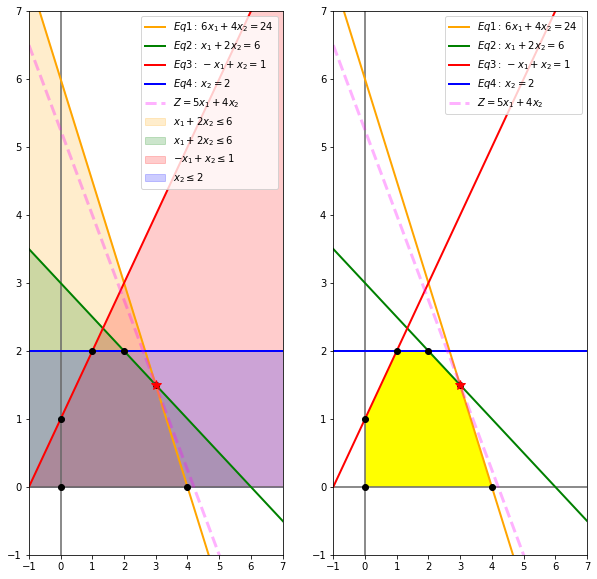

In [45]:
plt.figure(figsize=(10, 10))

#---- SUBPLOT ------
plt.subplot(1, 2, 1)
plt.xlim(-1, 7)
plt.ylim(-1, 7)

plt.axvline(0, color="0.4")
plt.axhline(0, color="0.4")

# Plot lines: x, f(x)
for equation, label, c in zip(equations, labels, colors):
    plt.plot(x, equation, lw=2, color=c, label=label)

# Plot best z line
plt.plot(x, zfunction(zbest, x), lw=3, color="magenta", ls="--", label=zlabel, alpha=0.3)

# Feasible solutions
for solution in solutions:
    plt.plot(
        solution[0], solution[1], 
        ls="", 
        marker='o', 
        # ms=14,
        color='k',
        )

# Best solution
plt.plot(
    solutions[best_index][0], solutions[best_index][1], 
    marker='*',
    color="red",
    ms=10,
    )

# Plot areas
plt.fill_between(x, 
                equation1, 
                where=(x < equation1), 
                color=colors[0], 
                alpha=0.2, 
                interpolate=True,
                label=r"$x_1 + 2x_2 \leq 6$")

plt.fill_between(x,
                 equation2, 
                 where=(x < equation2), 
                 color=colors[1], 
                 alpha=0.2, 
                 interpolate=True,
                 label=r"$x_1 + 2x_2 \leq 6$",
                 )

plt.fill_between(x, 
                equation3,
                where=(x <= equation3), 
                color=colors[2], 
                alpha=0.2, 
                interpolate=True,
                label=r"$-x_1 + x_2 \leq 1$")

plt.fill_between(x, 
                equation4,
                color=colors[3],
                alpha=0.2,
                label=r"$x_2 \leq 2$",
                )
plt.legend(
    fontsize=10, 
    loc="upper right"
    )
# ----- SUBPLOT -----
plt.subplot(1, 2, 2)
plt.xlim(-1, 7)
plt.ylim(-1, 7)

plt.axvline(0, color="0.4")
plt.axhline(0, color="0.4")
# Plot lines: x, f(x)
for equation, label, c in zip(equations, labels, colors):
    plt.plot(x, equation, lw=2, color=c, label=label)

# Plot best z line
plt.plot(x, zfunction(zbest, x), lw=3, color="magenta", ls="--", label=zlabel, alpha=0.3)

# Feasible solutions
for solution in solutions:
    plt.plot(
        solution[0], solution[1], 
        ls="", 
        marker='o', 
        # ms=14,
        color='k',
        )

# Best solution
plt.plot(
    solutions[best_index][0], solutions[best_index][1], 
    marker='*',
    color="red",
    ms=10,
    )

plt.fill(*coordinates, facecolor="yellow")

plt.legend(
    fontsize=10, 
    loc="upper right"
    )    
# -----
plt.show()
